In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
amplitude = [0.01,0.02,0.03];
frequency = [(1.5*np.pi*0.2),(2*np.pi*0.2),(2.5*np.pi*0.2)];
mat1_0,mat1_1,mat1_2 = [(amplitude[0], i) for i in frequency],[(amplitude[1], i) for i in frequency],[(amplitude[2], i) for i in frequency]
mat1 = mat1_0+mat1_1+mat1_2
matrix_run = mat1
resp_pattern = [np.sin(i[1]*np.linspace(0,300,num=3000))*i[0]+0.11 for i in matrix_run]


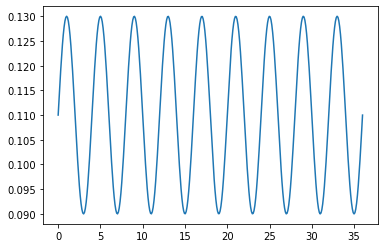

In [3]:
ScanLength = 15+420+15 # in seconds
ScanLength = 36 # in seconds
amp = 0.02
freq = ((2/4)*np.pi)
TimeInSec = np.linspace(0,ScanLength,num=ScanLength*10)
BreathingPattern = np.sin(freq*TimeInSec)*amp+0.11
plt.plot(TimeInSec, BreathingPattern)

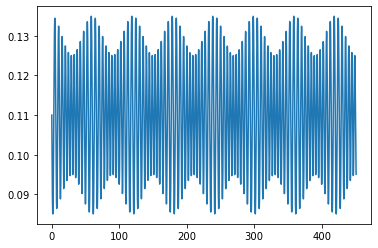

In [82]:
totaltime =15+420+15 # in seconds
# totaltime = 60
amp = 0.1 # amplitude of the carrier frequency
AMamp = 0.05 # Amplitude of the AM (depth) modulation
meanshift = 0.11 # The mean circle diameter should always be positive
# Due to frame rate differences and rounding, the final time point might be a few frames past the end of BreathingPattern
#   add an extra second to make sure the script never gets past the last value
TimingFudge = 1 
FC = 1/5 # Averaging 5s breathing cycles
FM = 1/60 # Breathing frequency modulates over 60s cycles
FCscale = (2*FC*np.pi)
FMscale = (2*FM*np.pi)
FreqDev = FC-1/6 # Frequency deviation between 2s and 3s breathing cycles
ModFreq = FreqDev/FM
PhaseShift = np.pi
# Time in seconds spaced in 0.1 second intervals
TimeInSec = np.linspace(0,totaltime+TimingFudge,num=(totaltime+TimingFudge)*10)
AMmod = -AMamp*np.cos(2*np.pi*TimeInSec*FM+PhaseShift)+0.2
BreathingPattern = AMmod*np.sin(2*np.pi*FC*TimeInSec + ModFreq*np.sin(2*np.pi*FM*TimeInSec+PhaseShift)+PhaseShift)*amp+meanshift
plt.figure()
plt.ion
plt.plot(TimeInSec, BreathingPattern)